<a href="https://colab.research.google.com/github/ashishjain135/ForestFireDetectionUsingDL/blob/main/ForestFireDetectionUsingDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

In [ ]:
#importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [ ]:
#To ensure the Gpu is present or not
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available.")
else:
    print("GPU is not available.")

In [ ]:
#load and explore the dataset
train_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train"
test_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test"
val_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val"

In [ ]:
#list all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)


#display the class names
print(f'Number of classes:', num_classes)
print(f'Classes:{classes}')

In [ ]:
#let's visualize the images in dataset
# 0 means Nofire
# 1 means fire
plt.figure(figsize=(12, 10))
for i in range(5):
    class_path = os.path.join(train_dir, classes[0])
    img_name = os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{classes[0]}\n shape:{img.shape}')
    plt.axis('off')

plt.show()



In [ ]:
plt.figure(figsize=(12, 10))
for i in range(5):
    class_path = os.path.join(train_dir, classes[1])
    img_name = os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{classes[1]}\n shape:{img.shape}')
    plt.axis('off')

plt.show()

In [ ]:
#preprocessing
#Image dimensions and batch size
img_width, img_height = 150,150
batch_size = 32 # there will be 32 images in batch


#Image Generator
train_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)
val_generator = ImageDataGenerator(rescale=1./255)


train_generator = train_generator.flow_from_directory(
    train_dir,
    target_size=(img_width,img_height),
    batch_size = batch_size,
    class_mode='binary',
    shuffle = True
)
val_generator = val_generator.flow_from_directory(
    val_dir,
    target_size=(img_width,img_height),
    batch_size = batch_size,
    class_mode='binary',
    shuffle = True
)
test_generator = test_generator.flow_from_directory(
    test_dir,
    target_size=(img_width,img_height),
    batch_size = batch_size,
    class_mode='binary',
    shuffle = True
)

In [ ]:
#map the indices
class_mapping = train_generator.class_indices
#print(class_mapping)
#Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:",class_names)

In [ ]:
#Let's build the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
  )

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#train the model
history = model.fit(
                    train_generator,
                    steps_per_epoch = train_generator.samples // batch_size,
                    epochs = 12,
                    validation_data = val_generator,
                    validation_steps = val_generator.samples // batch_size

                    )


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
18/58 ━━━━━━━━━━━━━━━━━━━━ 4:49 7s/step - accuracy: 0.6354 - loss: 0.7217

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


19/58 ━━━━━━━━━━━━━━━━━━━━ 4:52 8s/step - accuracy: 0.6341 - loss: 0.7205

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 564s 10s/step - accuracy: 0.6422 - loss: 0.6665 - val_accuracy: 0.7396 - val_loss: 0.4894
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7188 - loss: 0.5885

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7188 - loss: 0.5885 - val_accuracy: 0.7318 - val_loss: 0.4906
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 534s 9s/step - accuracy: 0.7781 - loss: 0.4704 - val_accuracy: 0.7422 - val_loss: 0.4898
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.7500 - loss: 0.4740 - val_accuracy: 0.7344 - val_loss: 0.4895
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 480s 8s/step - accuracy: 0.7920 - loss: 0.4545 - val_accuracy: 0.7578 - val_loss: 0.4496
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8438 - loss: 0.3605 - val_accuracy: 0.7760 - val_loss: 0.4446
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 476s 8s/step - accuracy: 0.8162 - loss: 0.4331 - val_accuracy: 0.7812 - val_loss: 0.4435
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8125 - loss: 0.4024 - val_accuracy: 0.7734 - val_loss: 0.4560
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 455s 8s/step - accuracy: 0.8093 - loss: 0.4272 - val_accuracy: 0.7578 - val_loss: 0.4

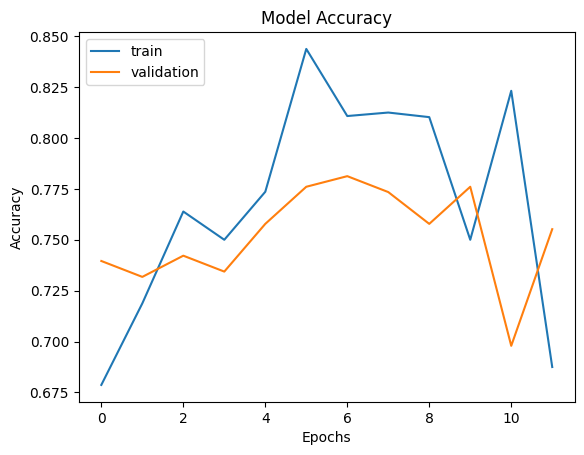

In [22]:
#evalute the model - plotting training and validation acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

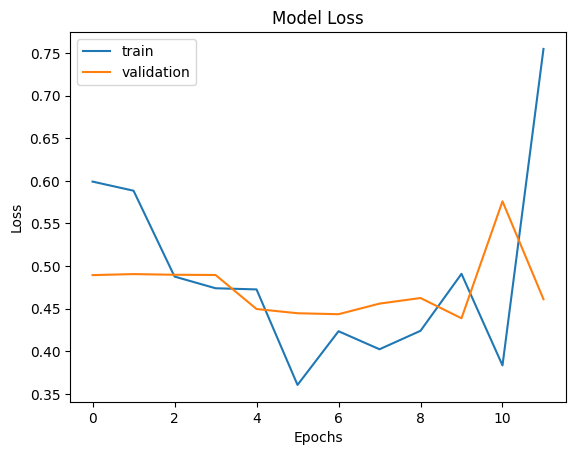

In [18]:
#Evaluate the model - plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'],loc = 'upper left')
plt.show();

In [23]:
#Evalute the model using test data
test_loss, test_acc = model.evaluate(test_generator,steps = test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 92s 7s/step - accuracy: 0.8087 - loss: 0.3908
Test Accuracy: 0.8281


In [20]:
# Save the our Model
model.save('FFD.keras')

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#load the model
model = load_model('FFD.keras')

#predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0


  prediction = model.predict(img_array)
  if prediction[0] >0.5:
    predicted_class = class_names[1]
    else:
      predicted_class = class_names[0]

plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

SyntaxError: invalid syntax (<ipython-input-24-4d5267e62c82>, line 17)

In [ ]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

In [ ]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire//kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/41058079202_08ce34a338_o.jpg')